## 1. zadatak 

- Koristiti **magnetno polje Sunca** iz prethodnog domaćeg (isti **FITS fajl**)  
- Podijeliti mapu na **četiri kvadratna podregiona** i za svaki kvadrant izračunati **prosječnu vrijednost** i **standardnu devijaciju** intenziteta magnetnog polja  
- Izabrati **gornji lijevi** i **donji desni** kvadrant – izračunati **Pirsnonov koeficijent korelacije** između vrijednosti magnetnog polja u ova dva kvadranta  
- **Interpretirati** dobijenu vrijednost


In [4]:
from astropy.io import fits
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [5]:
# Učitavanje FITS fajla
file = "magnetic_field_sun.fits"
hdul = fits.open(file)
data = hdul[0].data
hdul.close()

In [6]:
# Podjela na kvadrante
ny, nx = data.shape
half_y, half_x = ny // 2, nx // 2

UL = data[:half_y, :half_x]
UR = data[:half_y, half_x:]
LL = data[half_y:, :half_x]
LR = data[half_y:, half_x:]

In [7]:
# Računanje srednje vrijednosti i standardne devijacije
for ime, kv in zip(["UL", "UR", "LL", "LR"], [UL, UR, LL, LR]):
    print(f"{ime} kvadrant:")
    print(f"  Srednja vrijednost: {np.mean(kv):.2f}")
    print(f"  Standardna devijacija: {np.std(kv):.2f}")
    print()

UL kvadrant:
  Srednja vrijednost: 73.16
  Standardna devijacija: 78.14

UR kvadrant:
  Srednja vrijednost: 51.46
  Standardna devijacija: 45.44

LL kvadrant:
  Srednja vrijednost: 196.90
  Standardna devijacija: 379.17

LR kvadrant:
  Srednja vrijednost: 65.21
  Standardna devijacija: 50.73



In [8]:
# Pearsonova korelacija između UL i LR
r, p = pearsonr(UL.flatten(), LR.flatten())
print(f"Pearsonov koeficijent korelacije (UL vs LR): r = {r:.4f}, p = {p:.4e}")

Pearsonov koeficijent korelacije (UL vs LR): r = 0.0007, p = 9.6622e-01


In [9]:
import matplotlib.pyplot as plt


In [10]:
# Lista kvadranata i njihovih imena
kvadranti = [UL, UR, LL, LR]
naslovi = ["Gornji lijevi (UL)", "Gornji desni (UR)", "Donji lijevi (LL)", "Donji desni (LR)"]

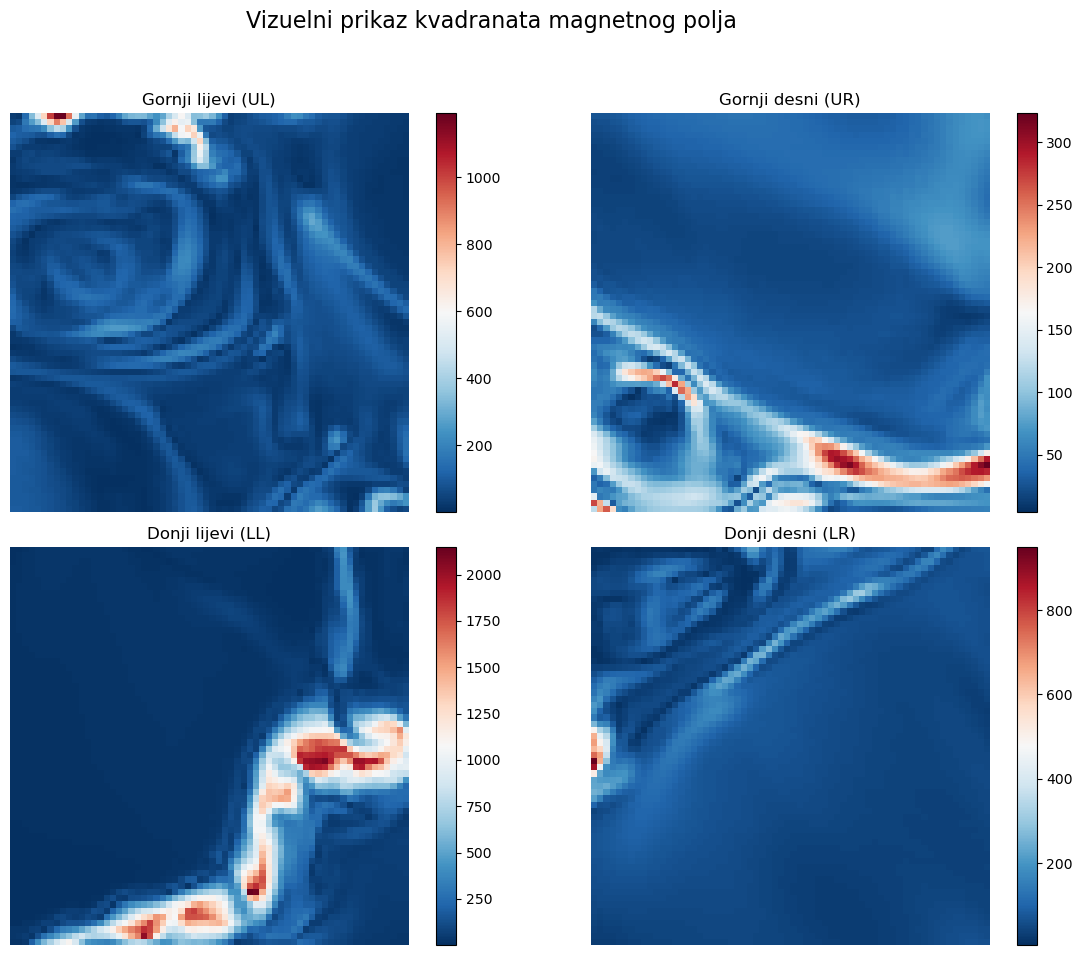

In [11]:
# Prikaz svih kvadranata u 2x2 rasporedu
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Vizuelni prikaz kvadranata magnetnog polja", fontsize=16)

for ax, kv, title in zip(axes.flat, kvadranti, naslovi):
    im = ax.imshow(kv, origin='lower', cmap='RdBu_r')
    ax.set_title(title)
    ax.axis('off')
    fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Vizuelni_prikaz_kvadranata_mp.png")
plt.show()

## 2. zadatak 

Razmotriti **neprekidnu funkciju** definisanu na intervalu $[0, 1]$:

$$
f(x) = x + \sin(5\pi x) + 1
$$

- Izračunati **konstantu normalizacije $C$** tako da je:

$$
p(x) = \frac{f(x)}{C}
$$

validna gustina raspodjele (tj. $\int_0^1 p(x)\,dx = 1$);

- Koristiti **uniformnu raspodjelu** na $[0, 1]$. Odrediti konstantu $M$ tako da za sve $x \in [0, 1]$ važi:

$$
M \cdot g(x) \geq p(x)
$$

- Implementirati metod **rejection sampling** za uzorkovanje iz $p(x)$ i naći **odnos prihvaćenih uzoraka**  
- Izračunati **kumulativnu funkciju** $F(x)$:

$$
F(x) = \int_0^x p(t)\,dt
$$

- Numerički doći do funkcije $F^{-1}(u)$, gdje je $u \sim \text{Uniform}(0, 1)$  
- Generisati uzorke primjenom $F^{-1}$ na uniformno raspodijeljene brojeve  
- Za obje metode plotovati **histograme uzoraka** i uporediti ih sa teorijskom funkcijom gustine $p(x)$


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [14]:
# Definisana funkcija f(x)
f = lambda x: x + np.sin(5 * np.pi * x) + 1

In [15]:
# 1. Normalizacija - računanje konstante C
C, _ = quad(f, 0, 1)
p = lambda x: f(x) / C  # normalizovana gustina

In [16]:
# 2. Određivanje konstante M za rejection sampling
g = lambda x: 1  # uniformna raspodjela na [0, 1]
x_vals = np.linspace(0, 1, 1000)
p_vals = p(x_vals)
M = np.max(p_vals / g(x_vals))

In [17]:
# 3. Rejection sampling
N = 100000
x_samples = np.random.uniform(0, 1, N)
y_samples = np.random.uniform(0, M, N)
accepted = x_samples[y_samples < p(x_samples)]
acceptance_ratio = len(accepted) / N

In [18]:
# 4. Inverzna transformacija
# Numerička integracija da dobijemo CDF
cdf_vals = np.cumsum(p_vals)
cdf_vals = cdf_vals / cdf_vals[-1]  # normalizacija
F_inv = interp1d(cdf_vals, x_vals, bounds_error=False, fill_value=(0,1))
u_samples = np.random.uniform(0, 1, len(accepted))
inv_samples = F_inv(u_samples)

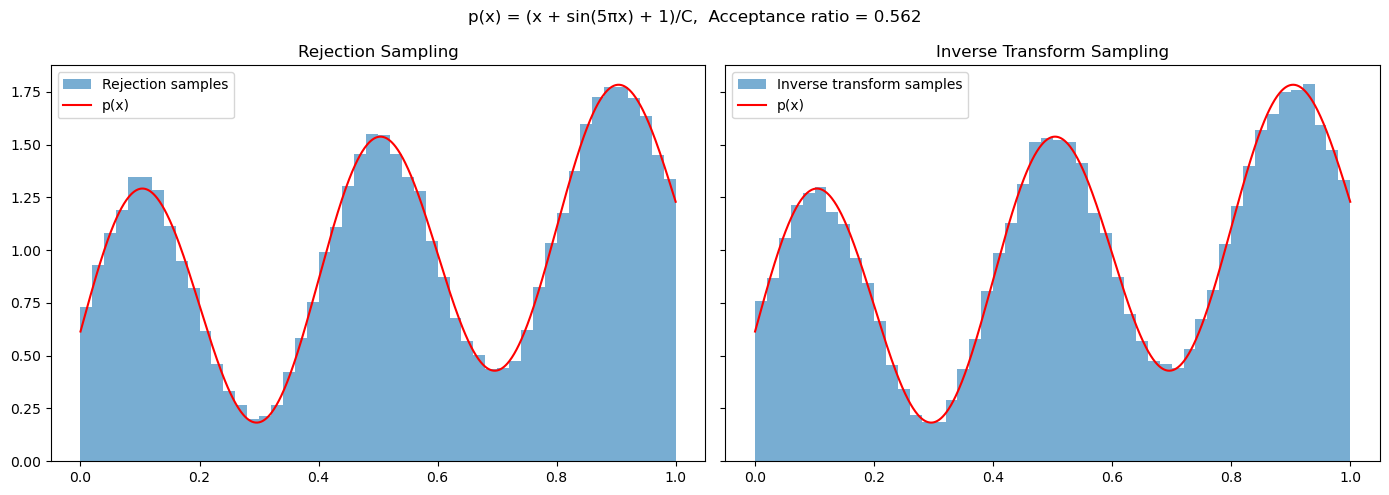

In [19]:
# 5. Prikaz rezultata
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Rejection sampling histogram
ax[0].hist(accepted, bins=50, density=True, alpha=0.6, label='Rejection samples')
ax[0].plot(x_vals, p_vals, 'r-', label='p(x)')
ax[0].set_title('Rejection Sampling')
ax[0].legend()

# Inverse transform sampling histogram
ax[1].hist(inv_samples, bins=50, density=True, alpha=0.6, label='Inverse transform samples')
ax[1].plot(x_vals, p_vals, 'r-', label='p(x)')
ax[1].set_title('Inverse Transform Sampling')
ax[1].legend()

plt.suptitle(f'p(x) = (x + sin(5πx) + 1)/C,  Acceptance ratio = {acceptance_ratio:.3f}')
plt.tight_layout()
plt.show()

In [20]:
# Vraćamo ključne rezultate
C, M, acceptance_ratio

(1.6273239544735163, 1.7833107341438565, 0.56218)